# Perceptrón: Caso práctico II

## Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este ejercicio práctico vamos a utilizar el Perceptrón para solucionar un problema más complejo que el anterior. En este caso, nuestro objetivo será clasificar un conjunto de imágener en base al número que se muestra en las mismas.

## 1. Lectura del conjunto de datos

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [2]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 2. Visualización del conjunto de datos

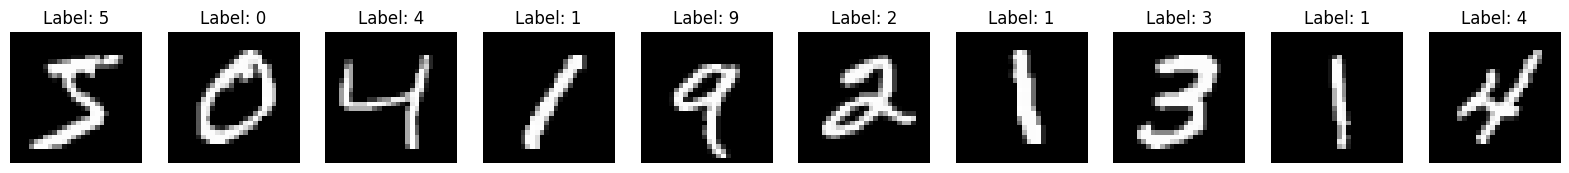

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

#TODO
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)

for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y[i]}", fontsize=12)

plt.show()

In [9]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

#TODO

df = pd.DataFrame(X)
df['label'] = y

# Mostramos las primeras filas del DataFrame
print(df.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


## 3. División del conjunto de datos

In [10]:
from sklearn.model_selection import train_test_split

#TODO

# Dividimos el DataFrame en características (X) y etiquetas (y)
X = df.drop('label', axis=1)  # Todos los píxeles de la imagen
y = df['label']               # La etiqueta de cada imagen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (56000, 784)
Tamaño de X_test: (14000, 784)
Tamaño de y_train: (56000,)
Tamaño de y_test: (14000,)


## 4. Entrenamiento del algoritmo

In [ ]:
from sklearn.linear_model import Perceptron

# clf = TODO

clf = Perceptron(random_state=42, max_iter=1000, alpha=0.0001, eta0=0.1, tol=1e-3)
clf.fit(X_train, y_train)



Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [35]:
# Número de parámetros que forman el modelo
clf.coef_.shape

(10, 784)

In [36]:
# Parámetros bias/intercept
clf.intercept_

array([-135.3,  -46.9, -163. , -346.6,  -92.2,  206.2, -171.5,  -35.9,
       -872.2, -202.7])

## 5. Predicción con el conjunto de pruebas

In [37]:
# Realizamos la predicción con el conjunto de datos de prueba
#y_pred = TODO

y_pred = clf.predict(X_test)

In [38]:
len(y_test)

14000

In [39]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

# TODO
# Previo: F1 Score del modelo en el conjunto de prueba: 0.8646109180743257

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score del modelo en el conjunto de prueba:", f1)

F1 Score del modelo en el conjunto de prueba: 0.8646109180743257


## 6. Mostrando las imagenes mal clasificadas

In [40]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

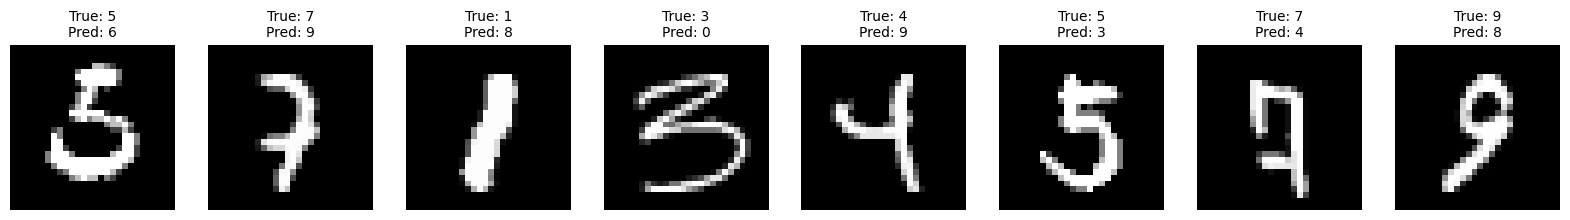

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    #TODO
    ax = plt.subplot(1, 8, i)
    
    # Seleccionamos la imagen correspondiente al índice del error
    img = X_test.iloc[img_index].values.reshape(28, 28)  # Redimensionamos la imagen
    
    # Mostramos la imagen en escala de grises
    ax.imshow(img, cmap='gray')
    
    # Etiquetas verdadera y predicha
    true_label = y_test.iloc[img_index]
    pred_label = y_pred[img_index]
    
    # Configuramos el título con la etiqueta real y la predicha
    ax.set_title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    ax.axis('off')  # Ocultamos los ejes

plt.show()

In [42]:
# Grid

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000}


In [ ]:
best_params1 = Perceptron(random_state=42, alpha=0.0001, eta0= 0.1, max_iter=1000)
best_params1.fit(X_train, y_train)
y_pred = best_params1.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score del modelo en el conjunto de prueba:", f1)

F1 Score del modelo en el conjunto de prueba: 0.86704016293269


c:\Users\David\anaconda3\envs\aprendizaje_auto_i\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Con optuna

In [43]:
!pip install optuna

import optuna

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 13.0 MB/s eta 0:00:00


c:\Users\David\anaconda3\envs\aprendizaje_auto_i\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [70]:
def objective(trial):
    # Hiperparámetros a optimizar
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)                          # Usamos suggest_float con log=True
    eta0 = trial.suggest_float('eta0', 1e-3, 1, log=True)                               # Usamos suggest_float con log=True
    max_iter = trial.suggest_int('max_iter', 1000, 10000)                               # número de iteraciones
    tol = trial.suggest_float('tol', 1e-6, 1e-3, log=True)                              # Usamos suggest_float con log=True
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])          # Tipo de penalización
    early_stopping = trial.suggest_categorical('early_stopping', [True, False])         # Si detener entrenamiento temprano
    n_iter_no_change = trial.suggest_int('n_iter_no_change', 5, 20)                     # Iteraciones sin mejora antes de detenerse
    warm_start = trial.suggest_categorical('warm_start', [True, False])                 # Reutilizar solución anterior
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])        # Peso de clases (balanceadas)

    # Creamos el modelo Perceptron
    clf = Perceptron(
        alpha=alpha, 
        eta0=eta0, 
        max_iter=max_iter, 
        tol=tol, 
        penalty=penalty,
        early_stopping=early_stopping,
        n_iter_no_change=n_iter_no_change,
        warm_start=warm_start,
        class_weight=class_weight,
        random_state=10
    )

    # Escalamos los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrenamos el modelo
    clf.fit(X_train_scaled, y_train)

    # Predicciones y cálculo del F1-score
    y_pred = clf.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred, average='weighted')

    return f1



In [71]:
# Definimos el estudio de Optuna
study = optuna.create_study(direction='maximize')  # Maximizar el f1_score
study.optimize(objective, n_trials=50)  # Ejecutamos la optimización en 50 ensayos

# Imprimimos los mejores parámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2024-11-12 17:19:45,909] A new study created in memory with name: no-name-8d144671-15da-43bd-8994-b0b0e39bc0d5
[I 2024-11-12 17:20:13,877] Trial 0 finished with value: 0.8541725697289746 and parameters: {'alpha': 0.0005831852759206501, 'eta0': 0.03471845709621286, 'max_iter': 4080, 'tol': 8.75814650647304e-05, 'penalty': 'l1', 'early_stopping': True, 'n_iter_no_change': 18, 'warm_start': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8541725697289746.
[I 2024-11-12 17:20:49,822] Trial 1 finished with value: 0.6424962789798339 and parameters: {'alpha': 0.01170796472152016, 'eta0': 0.15761060717883854, 'max_iter': 8915, 'tol': 0.0006287231540598871, 'penalty': 'l1', 'early_stopping': False, 'n_iter_no_change': 20, 'warm_start': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8541725697289746.
[I 2024-11-12 17:21:35,407] Trial 2 finished with value: 0.8642352279410425 and parameters: {'alpha': 0.00018570175140333935, 'eta0': 0.02159105416030176, 'max

Mejores hiperparámetros: {'alpha': 6.592444929090782e-05, 'eta0': 0.0033060171932333985, 'max_iter': 8647, 'tol': 0.0004539642743849618, 'penalty': 'elasticnet', 'early_stopping': False, 'n_iter_no_change': 9, 'warm_start': False, 'class_weight': 'balanced'}


In [ ]:
# Usamos los mejores parámetros encontrados
# Mejores hiperparámetros: {'alpha': 6.592444929090782e-05, 'eta0': 0.0033060171932333985, 'max_iter': 8647,
# 'tol': 0.0004539642743849618, 'penalty': 'elasticnet', 'early_stopping': False, 'n_iter_no_change': 9, 'warm_start': False, 'class_weight': 'balanced'}


best_params = study.best_params
best_clf = Perceptron(alpha=best_params['alpha'],
                      eta0=best_params['eta0'],
                      max_iter=best_params['max_iter'],
                      tol=best_params['tol'],
                      random_state=42)

# best_clf = Perceptron(alpha=0.0032191057963174897, eta0=0.006051994880577608, max_iter=4880, tol=4.223783952040316e-06, random_state=42)
# Entrenamos el mejor modelo
best_clf.fit(X_train_scaled, y_train)

# Realizamos predicciones
y_pred_best = best_clf.predict(X_test_scaled)

# Calculamos el F1-score del modelo optimizado
f1_best = f1_score(y_test, y_pred_best, average='weighted')
print("F1 Score del modelo optimizado:", f1_best)
    

F1 Score del modelo optimizado: 0.8845968078915054
